## Групповая статистика набора данных

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
D = pd.read_csv('lpsdf.csv')
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
t      45 non-null float64
v      45 non-null float64
isi    44 non-null float64
mod    45 non-null object
g      45 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.8+ KB


Из информации о наборе данных видно, что там есть 4 числовых колонки и одна нечисловая.

Для получения базовой статистики по числовым колонкам удобно использовать метод `describe()`

In [3]:
D.describe()

C:\a\WinPython\python-3.5.2.amd64\lib\site-packages\numpy\lib\function_base.py:3835: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,t,v,isi,g
count,45.000000,45.000000,44.000000,45.000000
mean,138.854800,0.394822,5.192386,4.800000
std,71.664159,0.085013,4.050174,2.536999
min,9.585000,0.282000,1.671000,2.000000
25%,86.385000,0.338000,NaN,2.000000
50%,117.612000,0.385000,NaN,4.000000
75%,207.373000,0.431000,NaN,8.000000
max,238.050000,0.698000,25.945000,8.000000


Зависимая переменная в колонке 'v' - время реакции, с. 
Значения зависимой переменной мы хотим сгруппировать по признакам модальность (`mod`) и группа с заданным МСИ (`g`)

In [4]:
D.groupby(by=['mod','g'])['v'].mean()

mod  g
a    2    0.392000
     4    0.456125
     8    0.464143
v    2    0.355143
     4    0.313857
     8    0.382444
Name: v, dtype: float64

В полученной серии сдвоенный индекс в соответствии с нашими группирующими признаками.

Мы можем такой группировочный объект сохранить в переменную, из которой можем получить различные статистические показатели.

In [5]:
g = D.groupby(by=['mod','g'])['v']
g

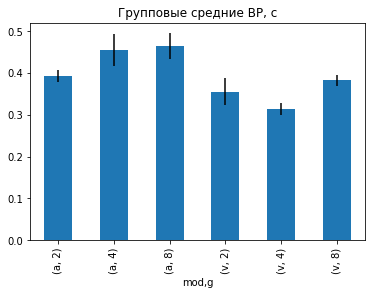

In [6]:
pd.tools.plotting.plot_series(g.mean(), kind='bar', yerr=g.sem(), 
                              title='Групповые средние ВР, с');

В данному случае мы отобразили групповые средние `.mean()` и ошибку средних `.sem()` в виде усов.
Подписи групп сформированы автоматически.

Фактически группировщик задает списки принадлежности исходных данных к найденным группам по их индексам.

In [7]:
g.groups

{('a', 2): [38, 39, 40, 41, 42, 43, 44],
 ('a', 4): [30, 31, 32, 33, 34, 35, 36, 37],
 ('a', 8): [23, 24, 25, 26, 27, 28, 29],
 ('v', 2): [16, 17, 18, 19, 20, 21, 22],
 ('v', 4): [9, 10, 11, 12, 13, 14, 15],
 ('v', 8): [0, 1, 2, 3, 4, 5, 6, 7, 8]}

Часто при группировке по двум и более факторам удобно получить итоговые значения на пересечениях всех значений факторов. 
(В терминологии Excel это называется сводная таблица)

In [8]:
P=D.pivot_table(index='mod',columns='g', values='v')
P

g,2,4,8
mod,,,
a,0.392000,0.456125,0.464143
v,0.355143,0.313857,0.382444


По-умолчанию, в сводной таблице считается среднее, но можно задать и другую агрегирующую функцию.

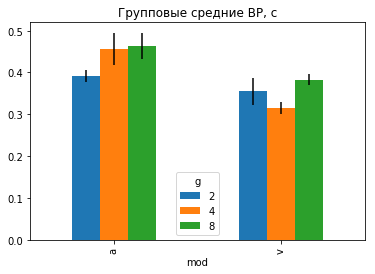

In [9]:
# с параметром aggfunc='sem' вычисляем такую же таблицу с ошибками среднего
E = D.pivot_table(index='mod',columns='g', values='v', aggfunc='sem')
P.plot(kind='bar', yerr=E, title='Групповые средние ВР, с');

Альтернативный способ взглянуть на эти данные - транспонировать сводную таблицу.

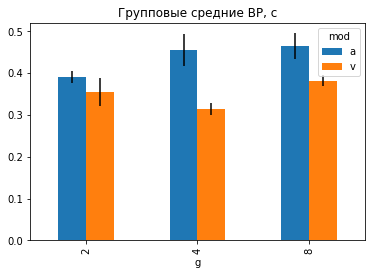

In [10]:
P.T.plot(kind='bar', yerr=E.T, title='Групповые средние ВР, с');

В подписях и легендах к рисункам в пакете `pandas` автоматически отображаются названия группирующих факторов. Это удобно и наглядно при предварительном анализе.

Для окончательных рисунков можно задать свои подписи с соответствующими параметрами. Или, наоборот, можно задать русские названия факторов и их значений.